# Finding suitable area to substitute inner district of Bangkok

## Introduction/Business Problem

## Table of Content
* [Data Acquisition](#DataAcquisition)
* [Methodology](#Methodology)
* [Analysis](#Analysis)
* [Results](#results)
* [Conclusion](#conclusion)

### Background

In Bangkok, capital of Thailand, the land price of this province has been considered one of the highest land prices in Thailand. Especially in the area of inner district of Bangkok which has been in a top 5 highest land price in the country such as Pathum Wan, Bang Rak, Sathon and Watthana District. These areas contain with places that essentially important to many Thai people for their living and their lifestyle such as major workplace and major department store. 

These areas have been considered desirable by many of Thai People. However, due to the high land price of these areas, most of the people are unable to afford to have a residential place in these areas. While there is possibility that the similar neighborhoods and places to these areas in other parts of Bangkok, The crucial of these areas still high for many of the people. The viable solution that will be effective to most of the people is to locate the area that like the inner district of Bangkok while still be able to travel into inner district of Bangkok conveniently. The areas might be able to locate in other districts of Bangkok.  

### Problem

Our purpose is how to find the suitable district for substituting the inner district of Bangkok. By determine the similarity of the high value areas in inner district of Bangkok to other districts in Bangkok throughout the commonality of category in places that locate within the area and the travel distant from those areas to inner district of Bangkok to determine the easiness of travel which will contribute into determine the suitability of that area as well

## Data Acquisition <a name="DataAcquisition"></a>

### Requirment

The similarity and suitability of each area in each district will be determined by the following data
* the data of places around each district and catagory of each places 
* traveling time from each area to inner district of Bangkok
* Geocoordinate(Ex. Latitude & Longitude) of each area of Bangkok

The following data can be retrieve by
* the data of places in each area can be retrieve from **Foursquare API**
* the Geocordinate & treving time (route information) from **HERE-map API**

### District Coordinate

First, retrive the list of name of each district in Bangkok. 
we will install "beautifulsoup4" for using in parsing HTML data from web

In [1]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


install "lxml" for parsing

In [2]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


Next,import the important library for using

In [3]:
from bs4 import BeautifulSoup # use for scaping web data
from IPython.display import display_html #Display the HTML representation of an object.
import requests #import requests method
import pandas as pd 
import numpy as np
print ("done")

done


Retrive the Bangkok district data from Wikipidia source

In [4]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok').text
soup = BeautifulSoup(source,'lxml')
print ('done')

done


In [5]:
table_html = soup.find('table') #find table in script we acquire

df1 = pd.read_html(str(table_html)) #returns a list of DataFrame objects:
dt_table = df1[0] #choose first index to create dataframe
dt_table.head() 

,District(Khet),Code,Thai,Population,No. ofSubdistricts(Khwaeng),Latitude,Longitude
0,Bang Bon,50,บางบอน,105161,4,NaN,NaN
1,Bang Kapi,6,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,40,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,5,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,31,บางคอแหลม,94956,3,13.693333,100.502500


Next, we retrieve Geocoordinate(Ex. Latitude & Longitude) for each of Bangkok District

In [6]:
dt_list=dt_table['District(Khet)'] #create list contain only Bangkok district data
dt_list.head()

0         Bang Bon
1        Bang Kapi
2        Bang Khae
3        Bang Khen
4    Bang Kho Laem
Name: District(Khet), dtype: object

Retrieve Geocoordinate(Ex. Latitude & Longitude) for each of Bangkok District through **HERE map API**

## code 1 <a name="code1"></a>

In [7]:
# provide APP_ID and APP_CODE for using HERE map API
APP_ID = 'Clear' 
APP_CODE = 'Clear'
print('done')

done


In [8]:
from pandas.io.json import json_normalize #using to convert json to dataframe
pdlist=[] #empty list to store each dataframe retrive from loop
#tstl=[1,2] #for test only
#create loop to retrieve all geo-coordinate of Bangkok District
for i in range(len(dt_list)):
    url = 'https://geocoder.api.here.com/6.2/geocode.json?&app_id={}&app_code={}&searchtext={},Bangkok'.format(
        APP_ID,
        APP_CODE,
        dt_list[i])

    results = requests.get(url).json()
    test= results['Response']['View'][0]['Result'][0]['Location']['DisplayPosition']
    a= json_normalize(test)
    pdlist.append(a)
#results
pdlist

[   Latitude  Longitude
 0  13.67544  100.42671,    Latitude  Longitude
 0  13.78297  100.64525,    Latitude  Longitude
 0  13.69901  100.42102,    Latitude  Longitude
 0  13.87404  100.59592,    Latitude  Longitude
 0  13.69822   100.4982,    Latitude  Longitude
 0  13.64144  100.43249,    Latitude  Longitude
 0  13.67614  100.59138,    Latitude  Longitude
 0  13.78576  100.49578,    Latitude  Longitude
 0  13.72176  100.51649,    Latitude  Longitude
 0  13.82132  100.53685,    Latitude  Longitude
 0  13.76466  100.47323,    Latitude  Longitude
 0  13.72465  100.47621,    Latitude  Longitude
 0  13.81932  100.64424,    Latitude  Longitude
 0   13.8188  100.55552,    Latitude  Longitude
 0  13.69785  100.46829,    Latitude  Longitude
 0  13.76067  100.55496,    Latitude  Longitude
 0  13.91813  100.58991,    Latitude  Longitude
 0  13.77231  100.51446,    Latitude  Longitude
 0  13.76757  100.57601,    Latitude  Longitude
 0  13.82285  100.67902,    Latitude  Longitude
 0  13.85167  10

In [9]:
res = pd.concat(pdlist).reset_index(drop=True) #combine dataframe and reset index
res

,Latitude,Longitude
0,13.67544,100.42671
1,13.78297,100.64525
2,13.69901,100.42102
3,13.87404,100.59592
4,13.69822,100.49820
5,13.64144,100.43249
6,13.67614,100.59138
7,13.78576,100.49578
8,13.72176,100.51649
9,13.82132,100.53685


Next, create Dataframe that contain Bangkok District data and Geo-coordinate

In [10]:
#create dataframe from district list
dt_data = dt_table[['District(Khet)']] #create dataframe contain only Bangkok district data
#combine geo-coordinate 
dt_data[['Latitude','Longitude']] = res[['Latitude','Longitude']]
dt_data.rename(columns={"District(Khet)":"District"},inplace=True) #rename columns
dt_data

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,District,Latitude,Longitude
0,Bang Bon,13.67544,100.42671
1,Bang Kapi,13.78297,100.64525
2,Bang Khae,13.69901,100.42102
3,Bang Khen,13.87404,100.59592
4,Bang Kho Laem,13.69822,100.49820
5,Bang Khun Thian,13.64144,100.43249
6,Bang Na,13.67614,100.59138
7,Bang Phlat,13.78576,100.49578
8,Bang Rak,13.72176,100.51649
9,Bang Sue,13.82132,100.53685


Because HERE API does not recognize Watthana distric and give geo-cordinate of Thawi Watthana district which is not the same district, we will add manually the value Latitude and Longitude manually

In [11]:
dt_data.iloc[48, dt_data.columns.get_loc('Latitude')] = 13.742222
dt_data.iloc[48, dt_data.columns.get_loc('Longitude')] = 100.585833
dt_data

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,District,Latitude,Longitude
0,Bang Bon,13.675440,100.426710
1,Bang Kapi,13.782970,100.645250
2,Bang Khae,13.699010,100.421020
3,Bang Khen,13.874040,100.595920
4,Bang Kho Laem,13.698220,100.498200
5,Bang Khun Thian,13.641440,100.432490
6,Bang Na,13.676140,100.591380
7,Bang Phlat,13.785760,100.495780
8,Bang Rak,13.721760,100.516490
9,Bang Sue,13.821320,100.536850


Now create the map of Bangkok to visualize the coordinate

In [12]:
pip install folium 

Note: you may need to restart the kernel to use updated packages.


In [13]:
import folium  #import folium to create


From wikipidia The geograpical coordinate of Bangkok, Thailand are N13.7525, E100.494167 

In [14]:
#define coridinate of Bangkok
latitude = 13.7525
longitude = 100.494167 

#create map of Bangkok
map_bangkok = folium.Map(location=[latitude, longitude], zoom_start=10)

#Add marker for each postal code to the map
for lat, lng, label in zip(dt_data['Latitude'], dt_data['Longitude'], dt_data['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangkok)  

map_bangkok

### Places data in each district

For this part, data of places around each area for determine the similarity of each district will be retrieve through **Foursquare API**

## code 2 <a name="code2"></a>

In [15]:
# provide CLIENT_ID and CLIENT_SECREE for using FOURSQUARE API
CLIENT_ID = 'Clear' 
CLIENT_SECRET = 'clear'
VERSION = '20190702'
print('done')

done


**For this project the data of 100 places within each district within a radius of 600 meters will be use.**

Create a function to repeat the same process to all district in bangkok and create Dataframe


In [16]:
LIMIT = 100 # limit of number of venues from Foursquare

radius = 600 # radius around cordinate unit 'meters' 

def getNearbyPlaces(names, latitudes, longitudes, radius=600):
    
    places_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL to Foursquare
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        places_list.append([(
            name, 
            lat, 
            lng, 
            p['venue']['name'], 
            p['venue']['location']['lat'], 
            p['venue']['location']['lng'],  
            p['venue']['categories'][0]['name']) for p in results])

    nearby_places = pd.DataFrame([item for places_list in places_list for item in places_list])
    nearby_places.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Place', 
                  'Place Latitude', 
                  'Place Longitude', 
                  'Place Category']
    
    return(nearby_places)

Create a new dataframe called "Bangkok_places" by running the above function on each district.

In [17]:
Bangkok_places = getNearbyPlaces(names=dt_data['District'],
                                   latitudes=dt_data['Latitude'],
                                   longitudes=dt_data['Longitude']
                                  )

print(dt_data.shape)

Bang Bon
Bang Kapi
Bang Khae
Bang Khen
Bang Kho Laem
Bang Khun Thian
Bang Na
Bang Phlat
Bang Rak
Bang Sue
Bangkok Noi
Bangkok Yai
Bueng Kum
Chatuchak
Chom Thong
Din Daeng
Don Mueang
Dusit
Huai Khwang
Khan Na Yao
Khlong Sam Wa
Khlong San
Khlong Toei
Lak Si
Lat Krabang
Lat Phrao
Min Buri
Nong Chok
Nong Khaem
Pathum Wan
Phasi Charoen
Phaya Thai
Phra Khanong
Phra Nakhon
Pom Prap Sattru Phai
Prawet
Rat Burana
Ratchathewi
Sai Mai
Samphanthawong
Saphan Sung
Sathon
Suan Luang
Taling Chan
Thawi Watthana
Thon Buri
Thung Khru
Wang Thonglang
Watthana
Yan Nawa
(50, 3)


In [18]:
Bangkok_places.head() #Example of Bangkok_places 

,District,District Latitude,District Longitude,Place,Place Latitude,Place Longitude,Place Category
0,Bang Bon,13.67544,100.42671,เกาเหลาตี๋อ้วน,13.674990,100.427645,Soup Place
1,Bang Bon,13.67544,100.42671,ม่วงศิริเบเกอรี่,13.675261,100.428273,Bakery
2,Bang Bon,13.67544,100.42671,ลิขิต ข้าวมันไก่ บางบอน,13.676970,100.431188,Thai Restaurant
3,Bang Bon,13.67544,100.42671,นพรัตน์ สปอร์ตคลับ,13.674305,100.430862,Pool
4,Bang Bon,13.67544,100.42671,Ekachai Market (ตลาดสดเอกชัย),13.675177,100.426072,Flea Market


**Prepare data ready for analyze**

In order to analyze each district, the dataframe that show the existance of each catagory of each place in each row will be created

In [19]:
# Create dummy value and column for each category. If the row contain category, value equl 1
Bangkok_ct = pd.get_dummies(Bangkok_places[['Place Category']], prefix="", prefix_sep="")

# add district column to dataframe
Bangkok_ct['District'] = Bangkok_places['District'] 

# move postcode column to the first column
fixed_columns = [Bangkok_ct.columns[-1]] + list(Bangkok_ct.columns[:-1])
Bangkok_ct = Bangkok_ct[fixed_columns]

Bangkok_ct.head()  # example of dataframe

,District,Accessories Store,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio,Yoshoku Restaurant
0,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Group up each row by their District and taking the mean of the frequency of occurrence of each category

In [20]:
Bangkok_grouped = Bangkok_ct.groupby('District').mean().reset_index()
Bangkok_grouped #example

,District,Accessories Store,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio,Yoshoku Restaurant
0,Bang Bon,0.000000,0.066667,0.00,0.000000,0.066667,0.000000,0.000000,0.066667,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
1,Bang Kapi,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.050000,0.000000,0.00,0.00,0.000000,0.000000,0.00
2,Bang Khae,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
3,Bang Khen,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.00,0.00,0.000000,0.000000,0.00
4,Bang Kho Laem,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
5,Bang Khun Thian,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
6,Bang Na,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
7,Bang Phlat,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
8,Bang Rak,0.000000,0.000000,0.00,0.000000,0.010000,0.000000,0.000000,0.040000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.01,0.000000,0.000000,0.00
9,Bang Sue,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00


### Distance to each other district

Another factor that will be use to determine the suitibility of each district is distance and travel time.

The travel distance will be calculate base on shortest distance to travel by car to each other district.

all of the data can be obtain from Route API from **HERE map API**

In [21]:
dlist=[] #empty list to store data retrive from loop

#create loop to retrieve route data of Bangkok District
for i in range(len(dt_list)):
    print('{}: Begin'.format(dt_data.loc[i,'District']))
    for j in range(len(dt_list)):
        url = 'https://route.api.here.com/routing/7.2/calculateroute.json?&app_id={}&app_code={}&waypoint0=geo!{},{}&waypoint1=geo!{},{}&&mode=shortest;car;traffic:disabled'.format(
            APP_ID,
            APP_CODE,
            dt_data.loc[i,'Latitude'],
            dt_data.loc[i,'Longitude'],
            dt_data.loc[j,'Latitude'],
            dt_data.loc[j,'Longitude'],
            )

        results = requests.get(url).json() #request data from HERE API
        test= results['response']['route'][0]['summary'] #access json file for distance data
        # append origin district, destination district and distance to
        dlist.append((
            dt_data.loc[i,'District'],
            dt_data.loc[j,'District'],
            test['distance'], 
            ))
    print('{}: Done'.format(dt_data.loc[i,'District']))
        
print('All Done')


Bang Bon: Begin
Bang Bon: Done
Bang Kapi: Begin
Bang Kapi: Done
Bang Khae: Begin
Bang Khae: Done
Bang Khen: Begin
Bang Khen: Done
Bang Kho Laem: Begin
Bang Kho Laem: Done
Bang Khun Thian: Begin
Bang Khun Thian: Done
Bang Na: Begin
Bang Na: Done
Bang Phlat: Begin
Bang Phlat: Done
Bang Rak: Begin
Bang Rak: Done
Bang Sue: Begin
Bang Sue: Done
Bangkok Noi: Begin
Bangkok Noi: Done
Bangkok Yai: Begin
Bangkok Yai: Done
Bueng Kum: Begin
Bueng Kum: Done
Chatuchak: Begin
Chatuchak: Done
Chom Thong: Begin
Chom Thong: Done
Din Daeng: Begin
Din Daeng: Done
Don Mueang: Begin
Don Mueang: Done
Dusit: Begin
Dusit: Done
Huai Khwang: Begin
Huai Khwang: Done
Khan Na Yao: Begin
Khan Na Yao: Done
Khlong Sam Wa: Begin
Khlong Sam Wa: Done
Khlong San: Begin
Khlong San: Done
Khlong Toei: Begin
Khlong Toei: Done
Lak Si: Begin
Lak Si: Done
Lat Krabang: Begin
Lat Krabang: Done
Lat Phrao: Begin
Lat Phrao: Done
Min Buri: Begin
Min Buri: Done
Nong Chok: Begin
Nong Chok: Done
Nong Khaem: Begin
Nong Khaem: Done
Pathum 

In [22]:
#create dataframe of bengin and end destrict and distance from list
distance_df = pd.DataFrame(item for item in dlist)
distance_df.columns = ['District Origin','District Destination','Distance']
    
distance_df.head()

,District Origin,District Destination,Distance
0,Bang Bon,Bang Bon,0
1,Bang Bon,Bang Kapi,32736
2,Bang Bon,Bang Khae,2940
3,Bang Bon,Bang Khen,32517
4,Bang Bon,Bang Kho Laem,9945


In order to visualize. the pivot table will be create

In [23]:
distance_pivot=distance_df.pivot(index='District Origin', columns='District Destination', values='Distance')
distance_pivot.head()

District Destination,Bang Bon,Bang Kapi,Bang Khae,Bang Khen,Bang Kho Laem,Bang Khun Thian,Bang Na,Bang Phlat,Bang Rak,Bang Sue,...,Saphan Sung,Sathon,Suan Luang,Taling Chan,Thawi Watthana,Thon Buri,Thung Khru,Wang Thonglang,Watthana,Yan Nawa
District Origin,,,,,,,,,,,,,,,,,,,,,
Bang Bon,0,32736,2940,32517,9945,3995,24805,17516,13566,22813,...,37364,13535,25435,16811,16849,8881,14069,26353,22693,16577
Bang Kapi,33353,0,32786,15054,23599,35544,17466,21399,20250,17939,...,8204,21170,10830,24735,40966,24803,31623,8350,12346,20574
Bang Khae,2940,32025,0,31806,10818,6935,24094,15802,12855,22102,...,36653,14372,24724,15097,13907,9733,17009,25642,21982,16622
Bang Khen,32424,15622,31227,0,23304,35288,25048,16935,19955,10308,...,18869,21303,24910,20179,36410,24479,33992,16049,20045,22791
Bang Kho Laem,9930,22881,10920,24069,0,12968,15023,12416,3349,15523,...,27509,3646,15889,11711,22539,1580,12645,16498,13147,6075


At this step the data of each district and mean of each category of places in district and the distance from each distrct to others has been obtain. This will conclude the data acquisition step.

## Methodology <a name="Methodology"></a>

This project intent to determine the similarity of each district and distance to each district. the similarity of each district will be determine through category of type of places around each district.

First, The data of category of each type of places in each district and distance from each district to others has been collected. 

Second, we analyze the similarity of each district and identify the cluster of districts that have similarity using **DBSCAN** method. 

Third,identify the cluster that contain inner district of Bangkok and rank suitability in the order of travel distant to that district. 

## Analysis <a name="Analysis"></a>

First, we grouping each district to cluster base on similarity of places in each district.

Since there is no information on amount of cluster, the **DBSCAN** method will be used to clustering the district. The important parameter of this method is 'Minimum sample' and 'Epsilon' which will be use to determine the core point in DBSCAN.

'Minimum sample' : the lowest number of datapoint that can be reach. 

'Epsilon': the radius from datapoint for finding other data point to reach.


Prepare dataframe for using in the analysis.

In [24]:
Bangkok_groupcal = Bangkok_grouped.drop(columns= ['District'] )
Bangkok_groupcal.head()

,Accessories Store,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio,Yoshoku Restaurant
0,0.0,0.066667,0.0,0.0,0.066667,0.0,0.0,0.066667,0.066667,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.111111,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.047619,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


For minimum point we determine by **ln(n)** where **n** is the total number of points to be clustered.

In [25]:
#use lenght of district list to find total number of points to be clustered
Minpoint= int(round(np.log(len(dt_list)))) #round the result and create interger
Minpoint

4

Next, the epsilon will be determine. The epsilon will be determine by finding the greatest change in distance between "K"nearest datapoint and amount of datapoint . In this place K = Minimum sample  

First, find distance from each datapoint to each other.

In [26]:
from sklearn.neighbors import NearestNeighbors #for using in calculate distancefro datapoint to each other

neigh = NearestNeighbors(Minpoint)
ax=neigh.fit(Bangkok_groupcal)
ax.kneighbors() # find distance to each other district 

(array([[0.27505629, 0.29687259, 0.30368112, 0.30709346],
        [0.27883927, 0.28986836, 0.29275035, 0.29469997],
        [0.33735994, 0.35916535, 0.39703516, 0.40775591],
        [0.2727178 , 0.28284271, 0.29137254, 0.3101525 ],
        [0.23003429, 0.23435152, 0.24196287, 0.24296019],
        [0.6296055 , 0.63435006, 0.63839203, 0.64315198],
        [0.2660463 , 0.28986836, 0.30737196, 0.31260421],
        [0.26465337, 0.29748791, 0.29807194, 0.31508993],
        [0.16404606, 0.17814854, 0.18209477, 0.18800308],
        [0.20651439, 0.23349101, 0.24293977, 0.24691556],
        [0.2545095 , 0.26465337, 0.27380863, 0.28586057],
        [0.17539638, 0.18207671, 0.19202508, 0.1961878 ],
        [0.18322734, 0.20153968, 0.20687501, 0.21624636],
        [0.21015379, 0.22627356, 0.23144779, 0.23824922],
        [0.43588989, 0.43604281, 0.43621238, 0.4381638 ],
        [0.21393537, 0.23380904, 0.25698408, 0.25849483],
        [0.34449447, 0.35430448, 0.35843022, 0.36055513],
        [0.346

Next, plot the result to visuallize.

Text(0, 0.5, 'K-distance')

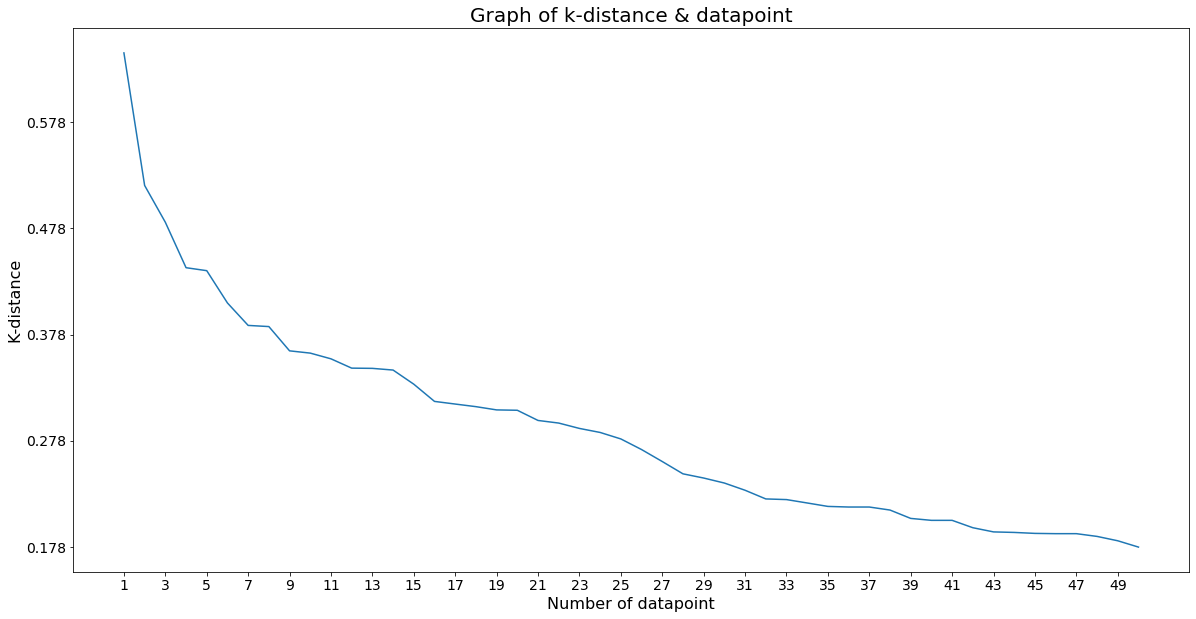

In [27]:
from matplotlib import pyplot as plt #for ploting graph
%matplotlib inline

distances, indices = ax.kneighbors()
distancesort = sorted(distances[:,Minpoint-1], reverse=True)

plt.figure(figsize=(20,10)) #set size of graph
plt.plot(range(1,len(dt_list)+1), distancesort) #transform index to number by +1
plt.xticks(np.arange(1, len(dt_list), 2.0),fontsize = 14) #set x axis and step
plt.yticks(np.arange(min(distancesort), max(distancesort),0.1),fontsize = 14) #set y axis and step
plt.title('Graph of k-distance & datapoint',fontsize = 20)
plt.xlabel('Number of datapoint',fontsize = 16)
plt.ylabel('K-distance',fontsize = 16)

From the graph, the knee point at datapoint 15 will be choose. 
Next step is to find K-distance at knee point.

In [28]:
KD=15 #choose number of datapoint
opti_eps = distancesort[KD-1] #set optimum epsilon value equal to k-distance
print('The k-distance at datapoint number {} has the value of {}'.format(KD,distancesort[KD-1]))

The k-distance at datapoint number 15 has the value of 0.33129689995814543


### Clustering District

Now, after we get 'minimum sample' and 'epsilon' we begin to clustering each district.

In [29]:
from sklearn.cluster import DBSCAN #import DBSCAN for using

Bangkok_cluster = DBSCAN(eps=opti_eps, min_samples=Minpoint).fit(Bangkok_groupcal)
Bangkok_cluster.labels_

array([ 0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,
       -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0])

Now, find the number of member in each cluster.

In [30]:
a=np.array(np.unique(Bangkok_cluster.labels_, return_counts=True))
len(a[0])

for i in range(len(a[0])):
    b=a[0][i]
    if b == -1 :
        print('The number of district that belong to outliner is {}'.format(a[1][i]))
    else:
        print('The number of district which in cluster {} is {}'.format(a[0][i],a[1][i]))
    

The number of district that belong to outliner is 10
The number of district which in cluster 0 is 40


Insert the cluster label into district dataframe.

In [31]:
Bangkok_group1 = Bangkok_grouped.insert(1,'Cluster',Bangkok_cluster.labels_) 

In [32]:
Bangkok_grouped.head()

,District,Cluster,Accessories Store,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio,Yoshoku Restaurant
0,Bang Bon,0,0.0,0.066667,0.0,0.0,0.066667,0.0,0.0,0.066667,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,Bang Kapi,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0
2,Bang Khae,-1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.111111,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,Bang Khen,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.200000,...,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0
4,Bang Kho Laem,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.047619,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


Get the example of new dataframe

Find unique Lable

In [33]:
np.unique(Bangkok_cluster.labels_)

array([-1,  0])

We found that there are one group of cluster that is '0' and the rest is outliner ,that is '-1' , that does not belong to any cluster 

Next we will determine that each inner district of Bangkok that has high price of land belong to which cluster

The Top 4 area of highest land price of Thailand in 2018 is locate in **"Pathum Wan"** , **"Bang Rak"** ,**"Sathon"** and **"Watthana"** District in Bangkok

In [34]:
inner_list=["Pathum Wan","Bang Rak","Sathon","Watthana"]
for i in inner_list:
    print('The {} District is in the Cluster {}'.format(i,Bangkok_grouped.loc[Bangkok_grouped['District'] == i,'Cluster'].values[0]))

The Pathum Wan District is in the Cluster 0
The Bang Rak District is in the Cluster 0
The Sathon District is in the Cluster 0
The Watthana District is in the Cluster 0


Now, create the map to visualize the cluster.

In [35]:
dt_data2=dt_data
dt_data2.insert(1,'Cluster',Bangkok_cluster.labels_) 
dt_data2

,District,Cluster,Latitude,Longitude
0,Bang Bon,0,13.675440,100.426710
1,Bang Kapi,0,13.782970,100.645250
2,Bang Khae,-1,13.699010,100.421020
3,Bang Khen,0,13.874040,100.595920
4,Bang Kho Laem,0,13.698220,100.498200
5,Bang Khun Thian,-1,13.641440,100.432490
6,Bang Na,0,13.676140,100.591380
7,Bang Phlat,0,13.785760,100.495780
8,Bang Rak,0,13.721760,100.516490
9,Bang Sue,0,13.821320,100.536850


Now, create a map that show each cluster of each district of bangkok

In [36]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# set color scheme for the clusters
x = np.arange(len(np.unique(Bangkok_cluster.labels_)))
ys = [i + x + (i*x)**2 for i in range(len(np.unique(Bangkok_cluster.labels_)))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#add markers to the map
markers_colors = []
for lat, lon, dist, cluster in zip(dt_data2['Latitude'], dt_data2['Longitude'], dt_data2['District'], dt_data2['Cluster']):
    label = folium.Popup(str(dist) + ' Cluster ' + str(cluster), parse_html=True) #create text in pop up lable
    folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_bangkok)
           
map_bangkok

From data, we found that **"Pathum Wan"**,**"Bang Rak"**,**"Sathon"**,**Watthana** district is in the same cluster  

Next, we will find distance from each district in cluster '0' to **"Pathum Wan"**,**"Bang Rak"**,**"Sathon"**,**Watthana** district

First, we create dataframe of each cluster and outliner

In [37]:
# create dataframe that contain district in cluster only
Prep0= Bangkok_grouped.loc[Bangkok_grouped['Cluster']==0]
Bangkok_clus0 = Prep0[['District']].reset_index(drop=True)

# create dataframe that contain outliner district only
Prep_out= Bangkok_grouped.loc[Bangkok_grouped['Cluster']== -1]
Bangkok_Out = Prep_out[['District']].reset_index(drop=True)

Bangkok_clus0

,District
0,Bang Bon
1,Bang Kapi
2,Bang Khen
3,Bang Kho Laem
4,Bang Na
5,Bang Phlat
6,Bang Rak
7,Bang Sue
8,Bangkok Noi
9,Bangkok Yai


and list of outliner

In [38]:
distance_inner = distance_df[distance_df['District Destination'].isin(["Pathum Wan","Bang Rak","Sathon","Watthana"])]
distance_inner

,District Origin,District Destination,Distance
8,Bang Bon,Bang Rak,13566
29,Bang Bon,Pathum Wan,17013
41,Bang Bon,Sathon,13535
48,Bang Bon,Watthana,22693
58,Bang Kapi,Bang Rak,20250
79,Bang Kapi,Pathum Wan,16895
91,Bang Kapi,Sathon,21170
98,Bang Kapi,Watthana,12346
108,Bang Khae,Bang Rak,12855
129,Bang Khae,Pathum Wan,16302


In [39]:
Bangkok_Out

,District
0,Bang Khae
1,Bang Khun Thian
2,Chom Thong
3,Don Mueang
4,Dusit
5,Khlong Sam Wa
6,Prawet
7,Rat Burana
8,Saphan Sung
9,Thawi Watthana


From distance data we retrive distance from each district to inner district as **"Pathum Wan"**,**"Bang Rak"**,**"Sathon"**,**Watthana** district. The unit of distance is 'Meter'.

Next, Choose the district of origin with in cluster '0'

In [40]:
distance_inner0 = distance_inner[distance_inner['District Origin'].isin(Bangkok_clus0['District'])] 
distance_inner0

,District Origin,District Destination,Distance
8,Bang Bon,Bang Rak,13566
29,Bang Bon,Pathum Wan,17013
41,Bang Bon,Sathon,13535
48,Bang Bon,Watthana,22693
58,Bang Kapi,Bang Rak,20250
79,Bang Kapi,Pathum Wan,16895
91,Bang Kapi,Sathon,21170
98,Bang Kapi,Watthana,12346
158,Bang Khen,Bang Rak,19955
179,Bang Khen,Pathum Wan,16295


Now,remove the district that have origin that same as destination.

In [41]:
#get index from dataframe that origin district is in inner district list 
indexname2 = distance_inner0[distance_inner0['District Origin'].isin(["Pathum Wan","Bang Rak","Sathon","Watthana"])].index 

#distance_inner0.drop(indexname,inplace=True)
distance_inner0.drop(indexname2,inplace=True)
distance_inner0

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,District Origin,District Destination,Distance
8,Bang Bon,Bang Rak,13566
29,Bang Bon,Pathum Wan,17013
41,Bang Bon,Sathon,13535
48,Bang Bon,Watthana,22693
58,Bang Kapi,Bang Rak,20250
79,Bang Kapi,Pathum Wan,16895
91,Bang Kapi,Sathon,21170
98,Bang Kapi,Watthana,12346
158,Bang Khen,Bang Rak,19955
179,Bang Khen,Pathum Wan,16295


Create pivot table to visualize.

In [42]:
distance_inner0pivot=distance_inner0.pivot(index='District Origin', columns='District Destination', values='Distance')
distance_inner0pivot.head()

District Destination,Bang Rak,Pathum Wan,Sathon,Watthana
District Origin,,,,
Bang Bon,13566,17013,13535,22693
Bang Kapi,20250,16895,21170,12346
Bang Khen,19955,16295,21303,20045
Bang Kho Laem,3349,7580,3646,13147
Bang Na,12189,11578,11807,8346


The suitability of district will be determine by the mean of the distance from each district to other inner district.

Calculate the mean of the distance from each district to inner district and sorted the dataframe by mean of distance in ascending order.

In [43]:
distance_inner0pivot['Mean Distance']=distance_inner0pivot.mean(axis=1) #calculate mean distance
distance_sorted0 = distance_inner0pivot.sort_values(by=['Mean Distance'])# sort each row by the mean
distance_sorted0

District Destination,Bang Rak,Pathum Wan,Sathon,Watthana,Mean Distance
District Origin,,,,,
Khlong Toei,5380,5264,5120,5559,5330.75
Pom Prap Sattru Phai,2815,3332,5043,10748,5484.50
Ratchathewi,6442,3067,8075,7512,6274.00
Yan Nawa,5857,7599,2548,9580,6396.00
Samphanthawong,3969,3744,6197,11902,6453.00
Phra Nakhon,5077,3645,7305,11619,6911.50
Bang Kho Laem,3349,7580,3646,13147,6930.50
Din Daeng,8064,4482,9490,6843,7219.75
Khlong San,3576,7445,5889,12703,7403.25


Next, explore the district and find type of places that each district have.

First, create dataframe that contain top 5 common place in each district.

In [44]:
#Create a function to sort the places in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
print('done')

done


In [45]:
#Create the new dataframe and display the top 5 venues for each neighborhood.
num_top_places = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_places):
    try:
        columns.append('{}{} Most Common Place'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Place'.format(ind+1))

# create a new dataframe
District_places_sorted = pd.DataFrame(columns=columns)
District_places_sorted['District'] = Bangkok_grouped['District']

for ind in np.arange(Bangkok_grouped.shape[0]):
    District_places_sorted.iloc[ind, 1:] = return_most_common_venues(Bangkok_grouped.iloc[ind, :], num_top_places)

District_places_sorted.head()

,District,1st Most Common Place,2nd Most Common Place,3rd Most Common Place,4th Most Common Place,5th Most Common Place
0,Bang Bon,Thai Restaurant,Flea Market,Bakery,Asian Restaurant,Supermarket
1,Bang Kapi,Thai Restaurant,Noodle House,Intersection,Playground,Restaurant
2,Bang Khae,Thai Restaurant,Convenience Store,Seafood Restaurant,Multiplex,Asian Restaurant
3,Bang Khen,Noodle House,Asian Restaurant,Garden Center,Thai Restaurant,Som Tum Restaurant
4,Bang Kho Laem,Coffee Shop,Thai Restaurant,Restaurant,Harbor / Marina,Tea Room


Next, choose the row that contain inner district regradless.

In [46]:
District_places_inner= District_places_sorted[District_places_sorted['District'].isin(["Pathum Wan",
                                                                                       "Bang Rak","Sathon",'Watthana'])]

District_places_inner

,District,1st Most Common Place,2nd Most Common Place,3rd Most Common Place,4th Most Common Place,5th Most Common Place
8,Bang Rak,Thai Restaurant,Hotel,Italian Restaurant,Spa,Café
29,Pathum Wan,Coffee Shop,Dessert Shop,Shopping Mall,Café,Clothing Store
41,Sathon,Noodle House,Asian Restaurant,Chinese Restaurant,Convenience Store,Thai Restaurant
48,Watthana,Café,Thai Restaurant,Coffee Shop,Hotel,Convenience Store


Next, choose the row that contain in cluster 0.

In [47]:
District_places_0 = District_places_sorted[District_places_sorted['District'].isin(distance_sorted0.index)]

District_places_0

,District,1st Most Common Place,2nd Most Common Place,3rd Most Common Place,4th Most Common Place,5th Most Common Place
0,Bang Bon,Thai Restaurant,Flea Market,Bakery,Asian Restaurant,Supermarket
1,Bang Kapi,Thai Restaurant,Noodle House,Intersection,Playground,Restaurant
3,Bang Khen,Noodle House,Asian Restaurant,Garden Center,Thai Restaurant,Som Tum Restaurant
4,Bang Kho Laem,Coffee Shop,Thai Restaurant,Restaurant,Harbor / Marina,Tea Room
6,Bang Na,Thai Restaurant,Noodle House,Asian Restaurant,Café,Seafood Restaurant
7,Bang Phlat,Convenience Store,Noodle House,Thai Restaurant,Soup Place,Flea Market
9,Bang Sue,Thai Restaurant,Noodle House,Convenience Store,Badminton Court,Spa
10,Bangkok Noi,Convenience Store,Noodle House,Market,Asian Restaurant,Dessert Shop
11,Bangkok Yai,Noodle House,Asian Restaurant,Thai Restaurant,Train Station,Dessert Shop
12,Bueng Kum,Thai Restaurant,Seafood Restaurant,Noodle House,BBQ Joint,Coffee Shop


## Result and Discussion <a name="results"></a>

From our analysis, based on a similarity of places in each district, there is only 1 cluster  and from 50 districts in Bangkok, there are 40 districts that belong to the same cluster which has been designate as "cluster 0". While the other 10 districts have been classified as outliner which does not belong to any cluster. From 4 of the inner districts of Bangkok that we are interested to compare, all of them, **Phatum Wan, Bang Rak,Sathon** and **Wattana** district, are in the same cluster,

Within the cluster 0 ,based on the mean of distance to inner district which is the member of the same cluster, the suitable districts have been determine by the shortest of mean of the distance. The top 10 suitable districts for this cluster are as follow
:

    1. Khlong Toei	

    2. Pom Prap Sattru Phai

    3. Ratchathewi	

    4. Yan Nawa	

    5. Samphanthawong

    6. Phra Nakhon 

    7. Bang Kho Laem

    8. Din Daeng

    9. Khlong San 

    10. Thon Buri


However, the suitability has based on similarity and distance and the similarity of each district in this analysis has based on the number of places in each cetegory that can be obtain each district along with the assumption that each category has the same important value.  

However, the important of each place can be different depend which category of places. For example, the supermarket, gas station or department store can be considered important to daily life than spa. The similarity between district might be determine by a few places in category that important than high number of places in non-important category. The important of each category of places can be include into calculating the cluster to determine the similarity by weight in on category of place that important to Thai people than other category of places. 


## Conclusion <a name="conclusion"></a>

In this finding, we intend to find the suitable district for substituting the inner district of Bangkok, Based on similarities and distance of each district to inner district of Bangkok. By using DBSCAN method to find the similarity of each district and distance travel by car to another district, we found that 40 out of 50 Districts of Bangkok have similarity to each other. This include the inner district of Bangkok. Using the mean distance to inner district we found that Khlong Toei District is the most suitable for substituting inner district.